# Project Objectives

Document code, process (data acquistion, preparation, exploratory data analysis and statistical testing, modeling, and model evaluation), findings, and key takeaways in a Jupyter Notebook Final Report.

Create modules (acquire.py, prepare.py) that make your process repeateable and your report (notebook) easier to read and follow.

Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

Construct a model to predict assessed home value for single family properties using regression techniques.

Make recommendations to a data science team about how to improve predictions.

Refine your work into a Report, in the form of a jupyter notebook, that you will walk through in a 5 minute presentation to a group of collegues and managers about the work you did, why, goals, what you found, your methdologies, and your conclusions.

Be prepared to answer panel questions about your code, process, findings and key takeaways, and model.

# Business Goals:

My goal is to find key driver for taxtotal in families property in 2017

Construct an ML Regression model that predict propery tax assessed values ('taxvaluedollarcnt') of Single Family Properties using attributes of the properties.

Find the key drivers of property value for single family properties. Some questions that come to mind are: Why do some properties have a much higher value than others when they are located so close to each other? Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? Is having 1 bathroom worse than having 2 bedrooms?

Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in prediction these homes' values.

# Questions:fix----

• What effect families houses values??

• Why do family house increase so much ??

• Can we stop the price increase ??

# Steps:
1-Data acquistion 

2-Preparation

3-Exploratory data analysis 

4-Modeling 

5-Model evaluation

In [1]:
import pandas as pd
import numpy as np 
import acquire
import prepare
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from IPython.display import IFrame

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings("ignore")
# Custom module imports
import acquire
α = .05
alpha= .05

In [2]:
df=acquire.sqlclean_zillow()
df.shape

(52441, 13)

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,regionidcounty,regionidzip,numberofstories,latitude,longitude,logerror,taxamount
0,2.0,1.0,930.0,67263.0,1945.0,6037.0,3101.0,96174.0,NaN,33962013.0,-118047660.0,0.793959,1115.79
1,4.0,2.0,2835.0,1104415.0,1962.0,6037.0,3101.0,96030.0,NaN,34074770.0,-118492861.0,0.033250,13482.23
2,5.0,5.0,5426.0,2969851.0,2011.0,6037.0,3101.0,96121.0,NaN,33762826.0,-118414643.0,0.144254,33797.88
3,6.0,7.0,6076.0,3834000.0,1956.0,6037.0,3101.0,96337.0,NaN,34162921.0,-118655106.0,0.089358,43255.31
4,3.0,2.0,1304.0,351730.0,1959.0,6111.0,2061.0,97099.0,1.0,34438672.0,-119262152.0,0.073319,4578.98


In [4]:
#prepare zillow using sql in the prepare.py file
df=prepare.prep_zillow(df)

In [5]:
df.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,County,Zip,latitude,longitude,Log_error,Taxamount,TotalRooms,Decade,location,los_angeles,orange,ventura
0,2.0,1.0,930.0,67263.0,1945.0,3101.0,96174.0,33962013.0,-118047660.0,0.793959,1115.79,3.0,1940,Los_Angeles,1,0,0
1,4.0,2.0,2835.0,1104415.0,1962.0,3101.0,96030.0,34074770.0,-118492861.0,0.033250,13482.23,6.0,1960,Los_Angeles,1,0,0
4,3.0,2.0,1304.0,351730.0,1959.0,2061.0,97099.0,34438672.0,-119262152.0,0.073319,4578.98,5.0,1950,Ventura,0,0,1
5,2.0,1.0,1045.0,251242.0,1913.0,3101.0,96246.0,33772988.0,-118156119.0,-0.047774,3069.33,3.0,1910,Los_Angeles,1,0,0
6,3.0,4.0,2410.0,1015893.0,1947.0,3101.0,96412.0,34153323.0,-118470096.0,-0.011103,12309.78,7.0,1940,Los_Angeles,1,0,0


In [11]:
# splitting data into train, validate, test 60,20,20 using the prepare.py
train,val,test=prepare.my_train_test_split(df)
train.shape,val.shape,test.shape

((28263, 17), (9422, 17), (9422, 17))

In [12]:
train.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,County,Zip,latitude,longitude,Log_error,Taxamount,TotalRooms,Decade,location,los_angeles,orange,ventura
2641,3.0,2.0,1976.0,403193.0,1955.0,3101.0,96474.0,34094699.0,-117875639.0,0.029309,5099.43,5.0,1950,Los_Angeles,1,0,0
9542,2.0,1.0,1116.0,35158.0,1921.0,3101.0,96004.0,34023091.0,-118185650.0,-0.075111,1039.36,3.0,1920,Los_Angeles,1,0,0
25031,3.0,2.5,1746.0,667517.0,1994.0,1286.0,96974.0,33601890.0,-117736296.0,0.174481,6638.42,5.5,1990,Orange,0,1,0
6648,3.0,2.0,1144.0,238249.0,1923.0,3101.0,95984.0,33972719.0,-118272455.0,0.273946,2981.06,5.0,1920,Los_Angeles,1,0,0
10580,3.0,2.0,1292.0,504513.0,1960.0,1286.0,97052.0,33791149.0,-118020938.0,0.060386,6413.52,5.0,1950,Orange,0,1,0


In [8]:
#Creating a scaled of each split to prevent leaks and to create proper modeling.
cols_to_scale=['Bedrooms','Bathrooms','Squarefeet','TaxesTotal','Year','County','Zip','latitude',
               'longitude','TotalRooms','Decade','los_angeles', 'orange', 'ventura','Taxamount','Log_error']
train_scaled, val_scaled, test_scaled = prepare.scale_data(train, val, test, cols_to_scale)

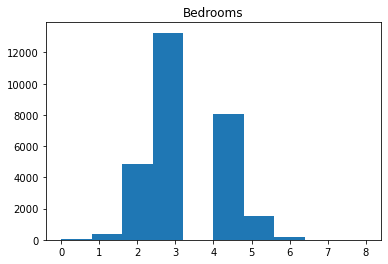

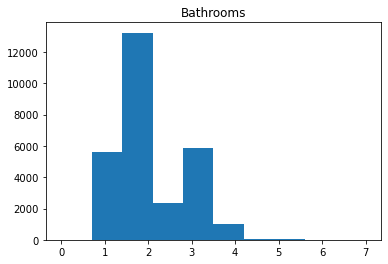

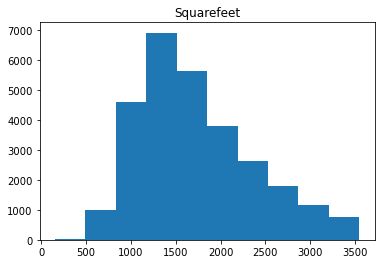

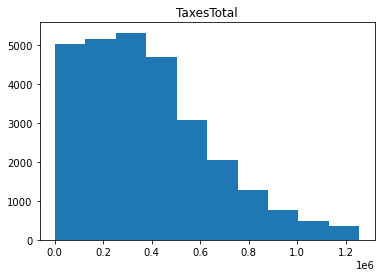

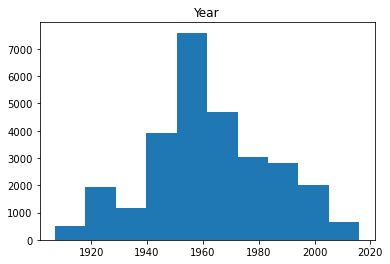

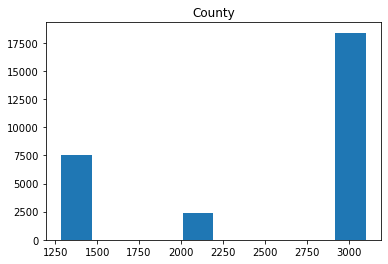

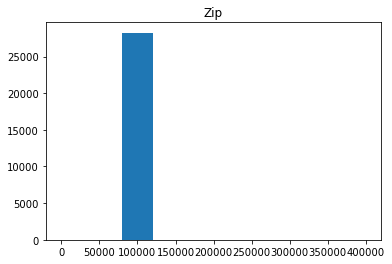

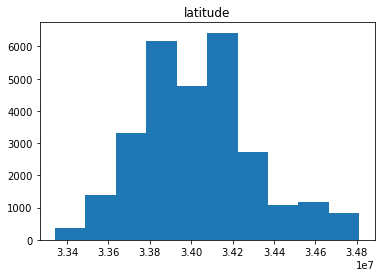

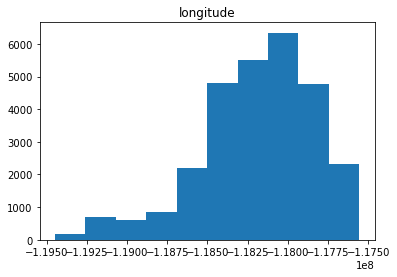

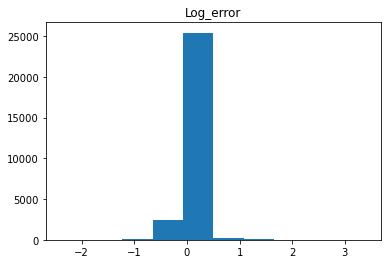

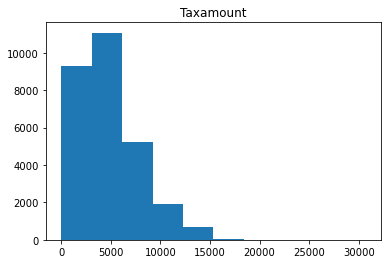

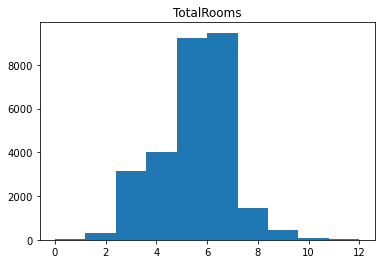

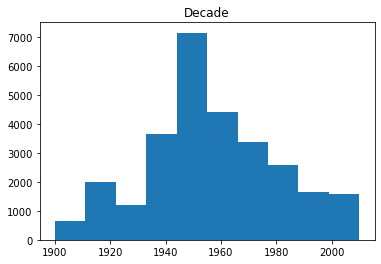

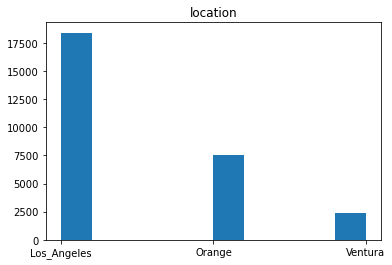

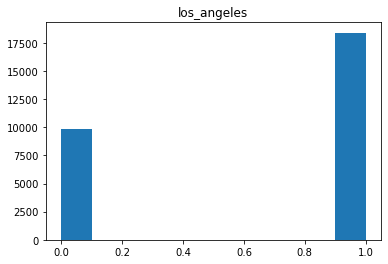

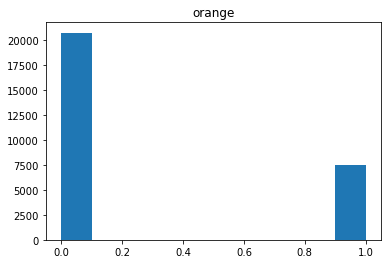

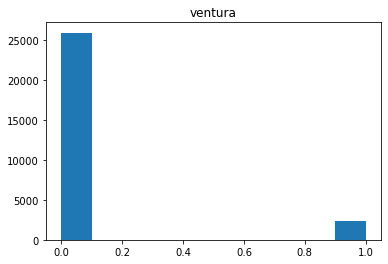

In [9]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

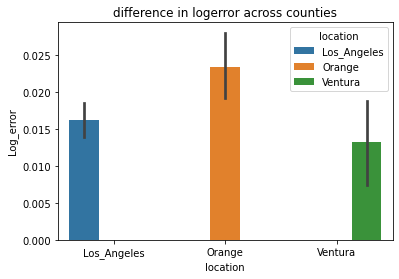

In [21]:
#orange has the highest logerror out of all of them aka countys
sns.barplot(data=train,x='location', y='Log_error',hue='location' )
plt.title('difference in logerror across counties')
plt.show()